In [6]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt


directory = "../data"
file = directory + "/gen1_pokemon_stats.csv"
csvfile = pd.read_csv(file)
data = pd.DataFrame(csvfile)
print(data.info)
X = pd.DataFrame(data[['hp']], columns=['hp'])
y = pd.Series(data['totalstat'], name='totalstat')
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X.values)

model = lin_reg.fit()
print_model = model.summary()
print()
print(print_model)

<bound method DataFrame.info of       hp  attack  defense  special-attack  special-defense  speed   type_1  \
0     45      49       49              65               65     45    grass   
1     60      62       63              80               80     60    grass   
2     80      82       83             100              100     80    grass   
3     39      52       43              60               50     65     fire   
4     58      64       58              80               65     80     fire   
..   ...     ...      ...             ...              ...    ...      ...   
146   41      64       45              50               50     50   dragon   
147   61      84       65              70               70     70   dragon   
148   91     134       95             100              100     80   dragon   
149  106     110       90             154               90    130  psychic   
150  100     100      100             100              100    100  psychic   

     type_2     Pokemon  totals

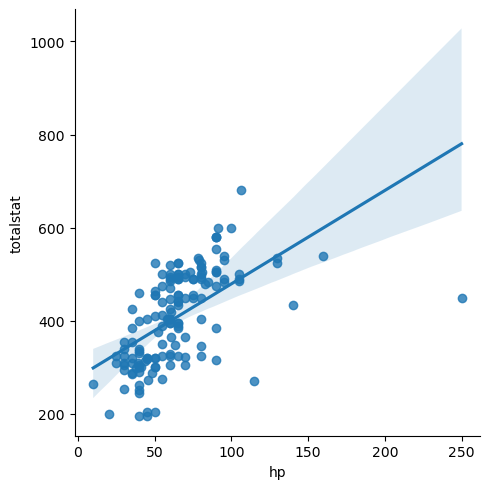

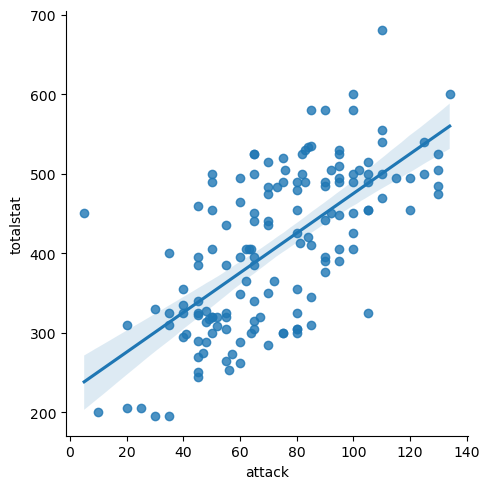

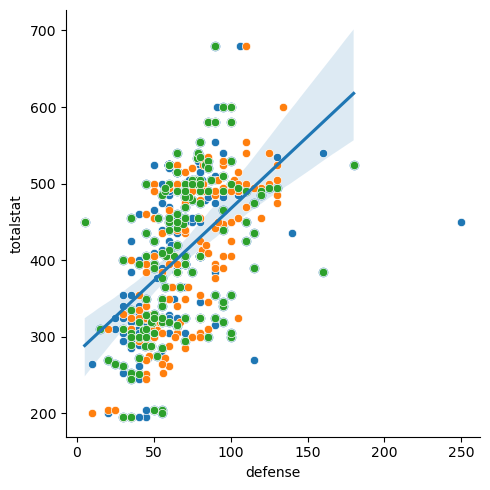

In [12]:
# visualizing with seaborn shows that these are very linearly correlated 
# Plot the regression lines
sns.lmplot(x='hp', y='totalstat', data=data)
sns.lmplot(x='attack', y='totalstat', data=data)
sns.lmplot(x='defense', y='totalstat', data=data)

# Plot the actual data points
sns.scatterplot(x='hp', y='totalstat', data=data)
sns.scatterplot(x='attack', y='totalstat', data=data)
sns.scatterplot(x='defense', y='totalstat', data=data)

# Show the plots
plt.show()


In [ ]:
#interprettion
#as we can see these attributes are clearly correlated positivley with totalstat
# we can reject the null hypothesis that these variables have no effect because the p value is so low it
# was rounded off to zero

In [7]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
directory = "../data"
file = directory + "/gen1_pokemon_stats.csv"
csvfile = pd.read_csv(file)
data = pd.DataFrame(csvfile)

# Select the features and target variable
X = data[['hp']]
y = data['totalstat']

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_model.fit(X, y)
lasso_predictions = lasso_model.predict(X)
lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
print("Lasso RMSE:", lasso_rmse)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge_model.fit(X, y)
ridge_predictions = ridge_model.predict(X)
ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
print("Ridge RMSE:", ridge_rmse)


Lasso RMSE: 81.49958985921221
Ridge RMSE: 81.49958978366963
